In [253]:
import warnings
warnings.filterwarnings('ignore')

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
sns.set()

In [255]:
bikes=pd.read_csv('day.csv')
bikes.shape

(730, 16)

In [256]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [257]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [258]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [259]:
#Lets check for null values in each of the columns
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [260]:
bikes['dteday'].dtype

dtype('O')

In [261]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

In [262]:
bikes['dteday']=pd.to_datetime(bikes['dteday'],format='%d-%m-%Y')
bikes['dteday'].dtype

dtype('<M8[ns]')

In [263]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [264]:
bikes['year']=pd.DatetimeIndex(bikes['dteday']).year
bikes['month']=pd.DatetimeIndex(bikes['dteday']).month

In [265]:
#drop yr and month columns since we have extracted correct year and month from dteday column
bikes.drop(columns=['yr','mnth'],axis=1,inplace=True)

In [266]:
bikes.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [267]:
#lets drop instant ,dteday,casual, registered and holiday columns
#holiday column->workingday column will take care of it , hence dropping
#instant column -> doesnt have any significance
#dte day -> have already extracted year and month from it
#casual and registered sum is displayed in cnt column so can be dropped
bikes.drop(columns=['dteday','instant','casual','registered','holiday'],axis=1,inplace=True)

In [268]:
bikes.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


### As per the requirement lets encode season and weather sit, so that we can plot a bar graph and check the frequency

In [269]:
codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
bikes['season'] = bikes['season'].map(codes)

In [270]:
codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bikes['weathersit'] = bikes['weathersit'].map(codes)

In [271]:
bikes.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,spring,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,spring,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,spring,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,spring,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,spring,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,2018,1


<AxesSubplot:xlabel='season', ylabel='cnt'>

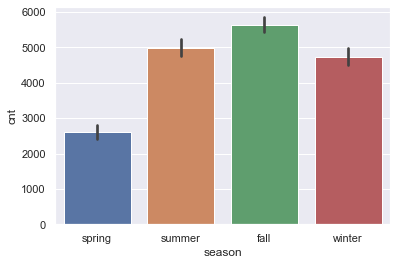

In [272]:
sns.barplot('season','cnt',data=bikes)

#### bike usage is less only during spring season

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

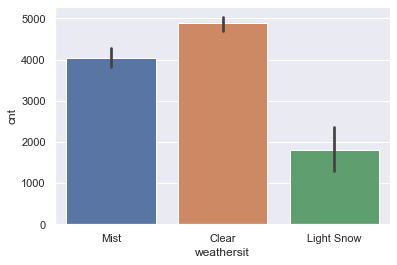

In [273]:
sns.barplot('weathersit','cnt',data=bikes)

#### bike usage is more during clear weather season

In [274]:
#lets encode working day where working day will be 1 and weekend or holiday will be zero
# we will then plot the frequency of usage
codes = {1:'working_day',0:'Holiday'}
bikes['workingday'] = bikes['workingday'].map(codes)

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

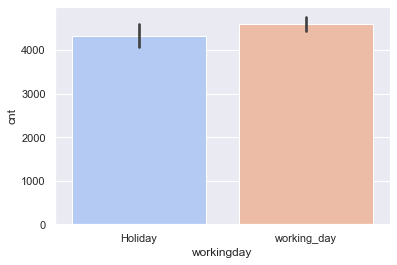

In [275]:
sns.barplot('workingday','cnt',data=bikes,palette='coolwarm')

### bikes are rented more on working days

In [276]:
#lets encode year column and check the frequency of the count using bar plot
codes = {2019:1,2018:0}
bikes['year'] = bikes['year'].map(codes)

<AxesSubplot:xlabel='year', ylabel='cnt'>

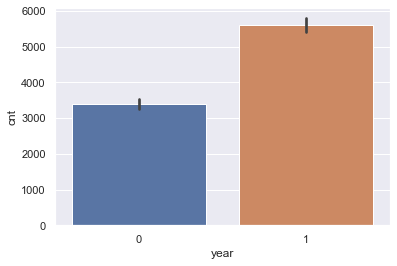

In [277]:
sns.barplot('year','cnt',data=bikes)

### bikes usage has bee more during 2019 than it was during 2018 indicating that it has increased in 2019

In [278]:
#let us also do a month wise usage mapping and then plot graph to see which month has more usage on year to year
#basis i.e comparing Jan of 2018 with Jan of 2019 , so on and so forth
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bikes['month'] = bikes['month'].map(codes)

<AxesSubplot:xlabel='month', ylabel='cnt'>

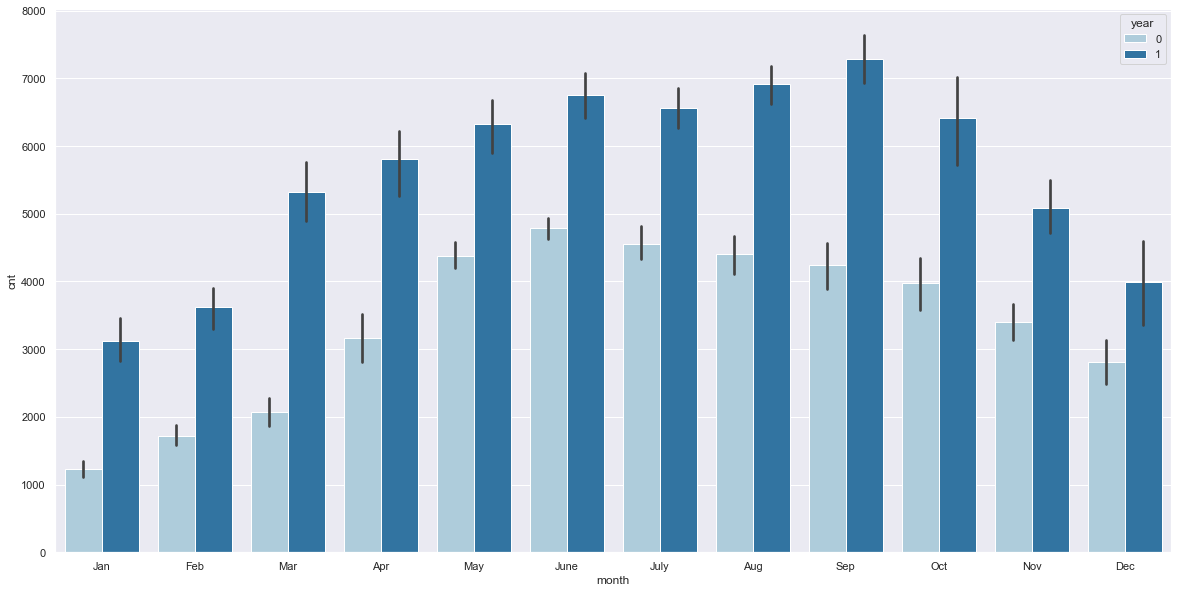

In [279]:
plt.figure(figsize=(20,10))
sns.barplot('month','cnt',hue='year',data=bikes,palette='Paired')

In [280]:
#lets repeat the same for weekday usage as well
codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bikes['weekday'] = bikes['weekday'].map(codes)


<AxesSubplot:xlabel='weekday'>

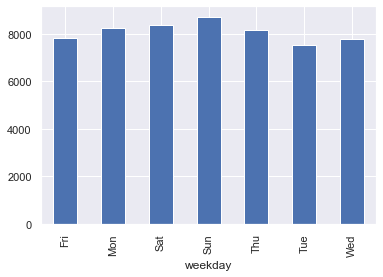

In [281]:
bikes.groupby('weekday')['cnt'].max().plot(kind='bar')


In [282]:
bikes.groupby('weekday')['cnt'].max()

weekday
Fri    7804
Mon    8227
Sat    8362
Sun    8714
Thu    8173
Tue    7525
Wed    7767
Name: cnt, dtype: int64

### bike rentals are maximum on Sunday,saturday and monday

### Plot the usage against weather like temp,atemp,humidity and windspeed

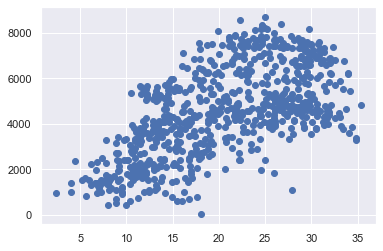

In [283]:
plt.scatter('temp','cnt',data=bikes)

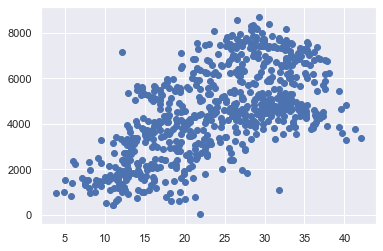

In [284]:
plt.scatter('atemp','cnt',data=bikes)

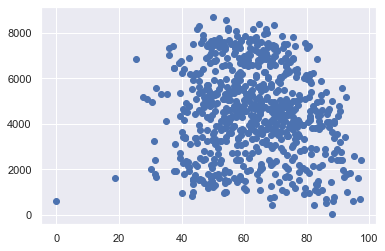

In [285]:
plt.scatter('hum','cnt',data=bikes)

### at higher temperature and humidity bike rentals are high

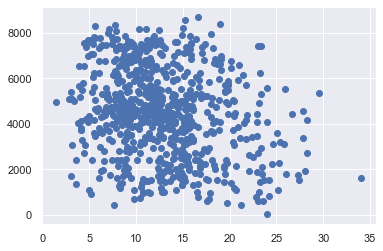

In [286]:
plt.scatter('windspeed','cnt',data=bikes)

### If windspeed is extremely then the bike rentals decreases

### lets plot heat map for correlation observation 

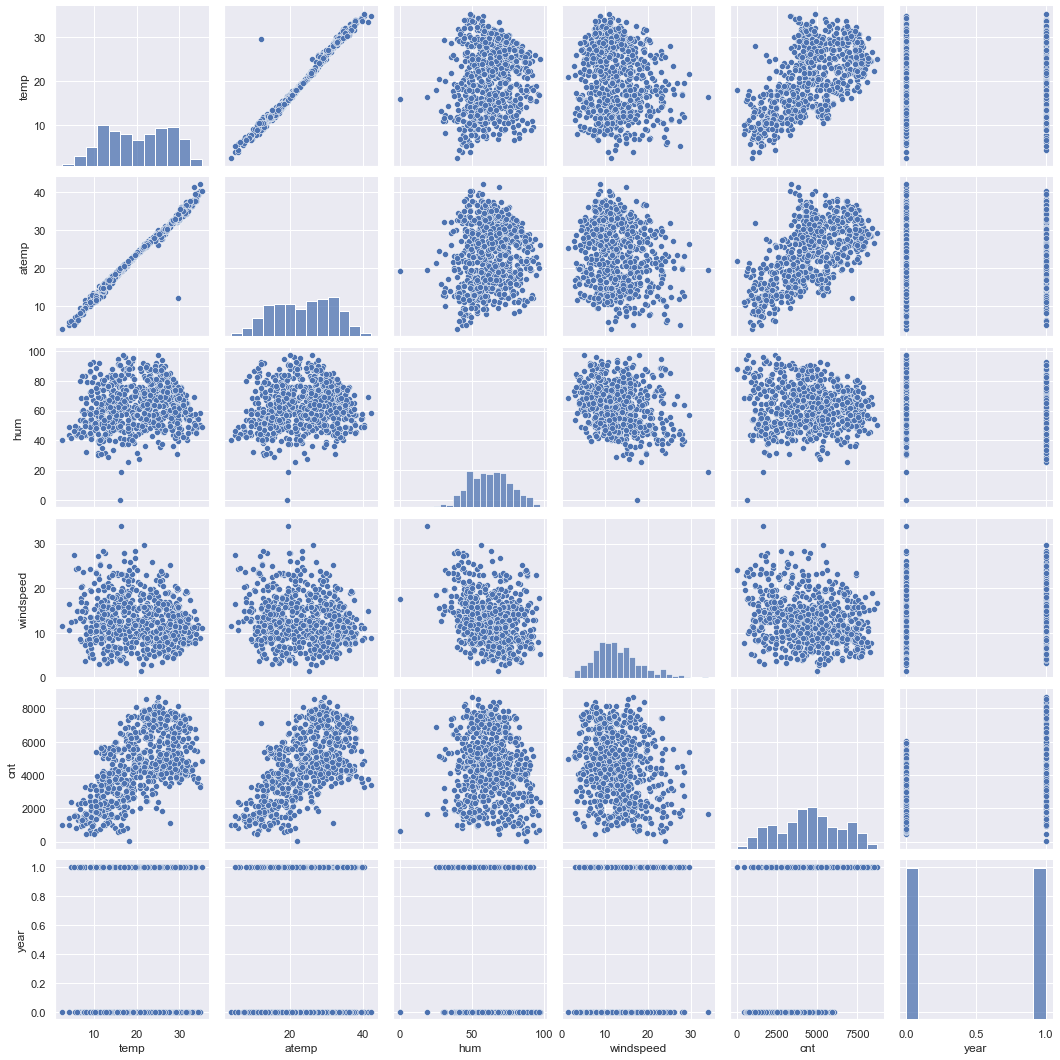

In [287]:
sns.pairplot(bikes)

<AxesSubplot:>

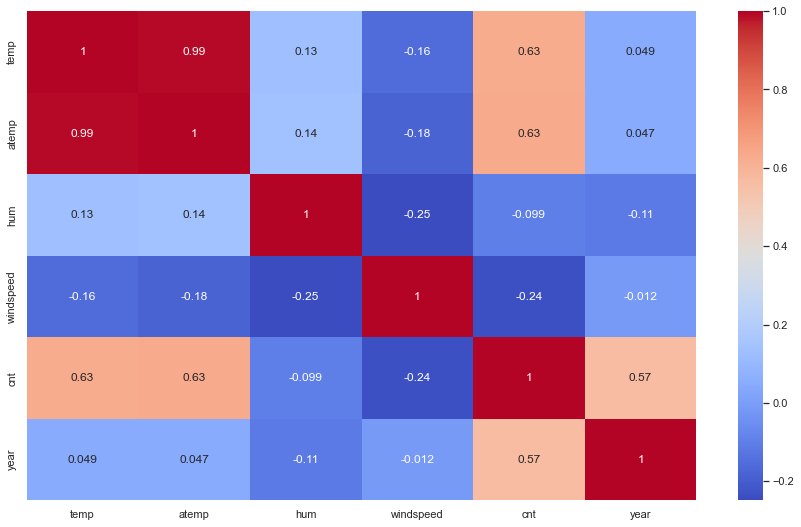

In [288]:
plt.figure(figsize=(15,9))
sns.heatmap(bikes.corr(),annot=True,cmap='coolwarm')

### lets plot heat map for correlation observation only for temperature ,humidity and wind variables

<AxesSubplot:>

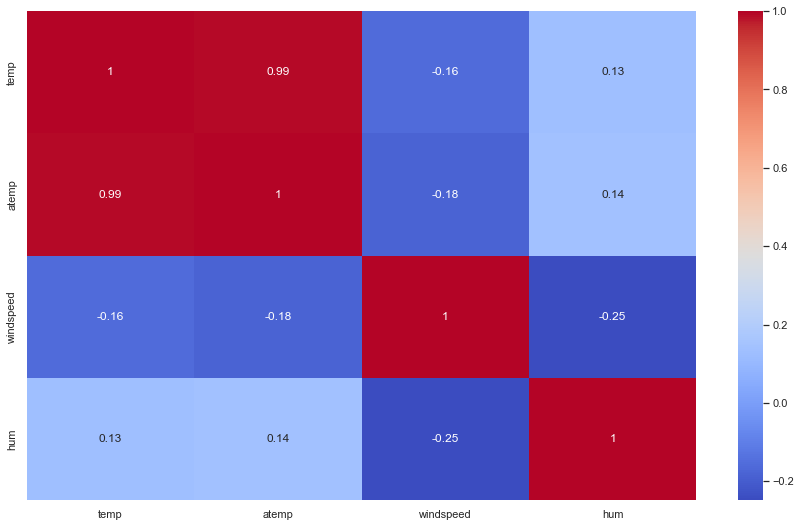

In [289]:
plt.figure(figsize=(15,9))
sns.heatmap(bikes[["temp","atemp","windspeed","hum"]].corr(),annot=True,cmap='coolwarm')

### from the figure above , temp and atemp are highly correlated , so better to drop atemp or temp,lets drop temp

In [290]:
bikes.drop('atemp',axis=1,inplace=True)

In [291]:
bikes.head()

,season,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,month
0,spring,Sun,Holiday,Mist,14.110847,80.5833,10.749882,985,0,Jan
1,spring,Mon,Holiday,Mist,14.902598,69.6087,16.652113,801,0,Jan
2,spring,Tue,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan
3,spring,Wed,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan
4,spring,Thu,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan


### categorical variables using dummies

In [292]:
seasons = pd.get_dummies(bikes['season'],drop_first=True)
week_day= pd.get_dummies(bikes['weekday'],drop_first=True)
working_day = pd.get_dummies(bikes['workingday'],drop_first=True)
weathersit= pd.get_dummies(bikes['weathersit'],drop_first=True)
month= pd.get_dummies(bikes['month'],drop_first=True)

In [293]:
weathersit

,Light Snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [294]:
month

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [295]:
#concatenate all these dummy values based columns and remove the corresponding actual 
#columns for which dummy values were created
bikes= pd.concat([bikes,seasons,week_day,working_day,weathersit,month],axis=1)

In [296]:
pd.set_option('display.max_columns', None)
bikes.head()

,season,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,month,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,working_day,Light Snow,Mist,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,spring,Sun,Holiday,Mist,14.110847,80.5833,10.749882,985,0,Jan,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,spring,Mon,Holiday,Mist,14.902598,69.6087,16.652113,801,0,Jan,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,spring,Tue,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,Wed,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,spring,Thu,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [297]:
bikes.drop(columns=['season','weekday','workingday','weathersit','month'],axis=1,inplace=True)


In [298]:
bikes.head()

,temp,hum,windspeed,cnt,year,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,working_day,Light Snow,Mist,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,8.050924,43.7273,16.636703,1349,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,8.200000,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


## Split the data into test and training set

In [299]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

## Since the different column values have number ranges in varying scale , we need to scale them down using standardisation

In [300]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()


In [301]:
#apply scaling to all the columns except dummy variables
scaling_vars=['temp','hum','windspeed','cnt']
df_train[scaling_vars]= scaler.fit_transform(df_train[scaling_vars])

In [302]:
df_train.head()

,temp,hum,windspeed,cnt,year,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,working_day,Light Snow,Mist,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,-0.121335,-0.514725,-0.117752,1.562685,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1.231731,0.516433,-0.330615,1.399629,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,-0.420478,-0.069854,-0.385694,-0.215554,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
728,-1.294913,-1.045032,2.018143,-1.379511,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,-0.627580,-1.000840,-0.779889,-0.136589,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [303]:
len(df_train.columns)

28

In [304]:
y_train=df_train.pop('cnt')
X_train=df_train

## Use Rfe to remove certain independent variables based on the ranking

In [305]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [306]:
lm =LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,16)
rfe=rfe.fit(X_train,y_train)

In [307]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', False, 4),
 ('windspeed', False, 2),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 9),
 ('Sun', True, 1),
 ('Thu', False, 10),
 ('Tue', False, 6),
 ('Wed', False, 7),
 ('working_day', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 5),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 12),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 8),
 ('Sep', True, 1)]

In [308]:
#select only those columns where rfe is supported
col = X_train.columns[rfe.support_]
col

Index(['temp', 'year', 'spring', 'summer', 'winter', 'Mon', 'Sun',
       'working_day', 'Light Snow', 'Mist', 'Dec', 'Feb', 'Jan', 'July', 'Nov',
       'Sep'],
      dtype='object')

In [309]:
X_train_rfe = X_train[col]

In [310]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [311]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [312]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     154.6
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.68e-180
Time:                        13:20:11   Log-Likelihood:                -266.05
No. Observations:                 510   AIC:                             566.1
Df Residuals:                     493   BIC:                             638.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7567      0.137     -5.525      0.000      -1.026      -0.488
temp            0.4489      0.038     11.743      0.000       0.374       0.524
year            1.0400      0.037     28.000      0.000       0.967       1.113
spring         -0.3272      0.101     -3.235      0.001      -0.526      -0.128
summer          0.1016      0.071      1.434      0.152      -0.038       0.241
winter          0.4179      0.082      5.119      0.000       0.258       0.578
Mon             0.2254      0.127      1.780      0.076      -0.023       0.474
Sun             0.4736      0.126      3.754      0.000       0.226       0.721
working_day     0.4381      0.119      3.674      0.000       0.204       0.672
Light Snow     -1.3984      0.112    -12.527      0.000      -1.618      -1.179
Mist           -0.3652      0.040     -9.214      0.000      -0.443      -0.287
Dec            -0.2024      0.084     -2.409      0.016      -0.367      -0.037
Feb            -0.1394      0.100     -1.389      0.166      -0.337       0.058
Jan            -0.2299      0.098     -2.341      0.020      -0.423      -0.037
July           -0.2140      0.084     -2.540      0.011      -0.379      -0.048
Nov            -0.2193      0.088     -2.501      0.013      -0.392      -0.047
Sep             0.3167      0.078      4.072      0.000       0.164       0.469
==============================================================================
Omnibus:                       89.164   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.502
Skew:                          -0.813   Prob(JB):                     1.50e-60
Kurtosis:                       6.213   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [313]:
#based on the data above , lets drop  Feb 
X_train1= X_train_rfe.drop(['Feb'],1)

In [314]:
X_train2= sm.add_constant(X_train1)
lm1 = sm.OLS(y_train,X_train2).fit()

In [315]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          5.34e-181
Time:                        13:20:59   Log-Likelihood:                -267.05
No. Observations:                 510   AIC:                             566.1
Df Residuals:                     494   BIC:                             633.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7813      0.136     -5.748      0.000      -1.048      -0.514
temp            0.4622      0.037     12.483      0.000       0.389       0.535
year            1.0389      0.037     27.950      0.000       0.966       1.112
spring         -0.3656      0.097     -3.753      0.000      -0.557      -0.174
summer          0.1145      0.070      1.628      0.104      -0.024       0.253
winter          0.4241      0.082      5.197      0.000       0.264       0.584
Mon             0.2337      0.127      1.846      0.065      -0.015       0.482
Sun             0.4855      0.126      3.854      0.000       0.238       0.733
working_day     0.4474      0.119      3.754      0.000       0.213       0.682
Light Snow     -1.3949      0.112    -12.487      0.000      -1.614      -1.175
Mist           -0.3655      0.040     -9.212      0.000      -0.443      -0.288
Dec            -0.1674      0.080     -2.087      0.037      -0.325      -0.010
Jan            -0.1563      0.083     -1.889      0.059      -0.319       0.006
July           -0.2175      0.084     -2.581      0.010      -0.383      -0.052
Nov            -0.2005      0.087     -2.312      0.021      -0.371      -0.030
Sep             0.3220      0.078      4.142      0.000       0.169       0.475
==============================================================================
Omnibus:                       85.482   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.278
Skew:                          -0.780   Prob(JB):                     6.76e-58
Kurtosis:                       6.155   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [316]:
# based on the p value drop Mon
X_train11= X_train1.drop(['Mon'],1)
X_train22= sm.add_constant(X_train11)
lm1 = sm.OLS(y_train,X_train22).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.15e-181
Time:                        13:22:02   Log-Likelihood:                -268.80
No. Observations:                 510   AIC:                             567.6
Df Residuals:                     495   BIC:                             631.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5786      0.080     -7.202      0.000      -0.736      -0.421
temp            0.4607      0.037     12.414      0.000       0.388       0.534
year            1.0397      0.037     27.906      0.000       0.966       1.113
spring         -0.3729      0.098     -3.823      0.000      -0.565      -0.181
summer          0.1134      0.070      1.609      0.108      -0.025       0.252
winter          0.4249      0.082      5.195      0.000       0.264       0.586
Sun             0.2863      0.065      4.395      0.000       0.158       0.414
working_day     0.2480      0.051      4.905      0.000       0.149       0.347
Light Snow     -1.3920      0.112    -12.432      0.000      -1.612      -1.172
Mist           -0.3637      0.040     -9.147      0.000      -0.442      -0.286
Dec            -0.1715      0.080     -2.133      0.033      -0.329      -0.014
Jan            -0.1600      0.083     -1.930      0.054      -0.323       0.003
July           -0.2133      0.084     -2.526      0.012      -0.379      -0.047
Nov            -0.2194      0.086     -2.542      0.011      -0.389      -0.050
Sep             0.3118      0.078      4.012      0.000       0.159       0.465
==============================================================================
Omnibus:                       87.975   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.144
Skew:                          -0.799   Prob(JB):                     2.95e-60
Kurtosis:                       6.217   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [317]:
# based on the p value drop Jan
X_train12= X_train11.drop(['Jan'],1)
X_train23= sm.add_constant(X_train12)
lm1 = sm.OLS(y_train,X_train23).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.2
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          9.73e-182
Time:                        13:23:06   Log-Likelihood:                -270.71
No. Observations:                 510   AIC:                             569.4
Df Residuals:                     496   BIC:                             628.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6005      0.080     -7.530      0.000      -0.757      -0.444
temp            0.4825      0.035     13.614      0.000       0.413       0.552
year            1.0371      0.037     27.777      0.000       0.964       1.110
spring         -0.3866      0.098     -3.962      0.000      -0.578      -0.195
summer          0.1337      0.070      1.914      0.056      -0.004       0.271
winter          0.4415      0.082      5.413      0.000       0.281       0.602
Sun             0.2849      0.065      4.361      0.000       0.157       0.413
working_day     0.2471      0.051      4.874      0.000       0.148       0.347
Light Snow     -1.3791      0.112    -12.305      0.000      -1.599      -1.159
Mist           -0.3670      0.040     -9.214      0.000      -0.445      -0.289
Dec            -0.1344      0.078     -1.717      0.087      -0.288       0.019
July           -0.2203      0.085     -2.605      0.009      -0.386      -0.054
Nov            -0.1978      0.086     -2.305      0.022      -0.366      -0.029
Sep             0.3177      0.078      4.080      0.000       0.165       0.471
==============================================================================
Omnibus:                       83.796   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.714
Skew:                          -0.766   Prob(JB):                     1.80e-56
Kurtosis:                       6.120   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [318]:
# based on the p value drop Dec
X_train13= X_train12.drop(['Dec'],1)
X_train24= sm.add_constant(X_train13)
lm1 = sm.OLS(y_train,X_train24).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     201.8
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.90e-182
Time:                        13:24:20   Log-Likelihood:                -272.22
No. Observations:                 510   AIC:                             570.4
Df Residuals:                     497   BIC:                             625.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6213      0.079     -7.867      0.000      -0.776      -0.466
temp            0.4974      0.034     14.448      0.000       0.430       0.565
year            1.0377      0.037     27.742      0.000       0.964       1.111
spring         -0.3636      0.097     -3.755      0.000      -0.554      -0.173
summer          0.1515      0.069      2.189      0.029       0.016       0.288
winter          0.4157      0.080      5.175      0.000       0.258       0.573
Sun             0.2816      0.065      4.304      0.000       0.153       0.410
working_day     0.2456      0.051      4.835      0.000       0.146       0.345
Light Snow     -1.3638      0.112    -12.184      0.000      -1.584      -1.144
Mist           -0.3651      0.040     -9.152      0.000      -0.443      -0.287
July           -0.2205      0.085     -2.601      0.010      -0.387      -0.054
Nov            -0.1419      0.080     -1.784      0.075      -0.298       0.014
Sep             0.3334      0.077      4.303      0.000       0.181       0.486
==============================================================================
Omnibus:                       78.409   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.932
Skew:                          -0.736   Prob(JB):                     8.70e-50
Kurtosis:                       5.910   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [319]:
# based on the p value drop Nov
X_train14= X_train13.drop(['Nov'],1)
X_train25= sm.add_constant(X_train14)
lm1 = sm.OLS(y_train,X_train25).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          9.28e-183
Time:                        13:25:54   Log-Likelihood:                -273.85
No. Observations:                 510   AIC:                             571.7
Df Residuals:                     498   BIC:                             622.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6407      0.078     -8.172      0.000      -0.795      -0.487
temp            0.5071      0.034     14.886      0.000       0.440       0.574
year            1.0374      0.037     27.673      0.000       0.964       1.111
spring         -0.3379      0.096     -3.521      0.000      -0.526      -0.149
summer          0.1646      0.069      2.386      0.017       0.029       0.300
winter          0.3844      0.079      4.893      0.000       0.230       0.539
Sun             0.2871      0.065      4.383      0.000       0.158       0.416
working_day     0.2487      0.051      4.889      0.000       0.149       0.349
Light Snow     -1.3553      0.112    -12.092      0.000      -1.575      -1.135
Mist           -0.3621      0.040     -9.064      0.000      -0.441      -0.284
July           -0.2185      0.085     -2.573      0.010      -0.385      -0.052
Sep             0.3483      0.077      4.511      0.000       0.197       0.500
==============================================================================
Omnibus:                       76.444   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.462
Skew:                          -0.728   Prob(JB):                     4.44e-47
Kurtosis:                       5.816   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [320]:
X_train14.head()

,const,temp,year,spring,summer,winter,Sun,working_day,Light Snow,Mist,July,Sep
653,1.0,-0.121335,1,0,0,1,0,1,0,0,0,0
576,1.0,1.231731,1,0,0,0,0,1,0,0,1,0
426,1.0,-0.420478,1,1,0,0,1,0,0,1,0,0
728,1.0,-1.294913,1,1,0,0,0,0,0,0,0,0
482,1.0,-0.627580,1,0,1,0,1,0,0,1,0,0


In [321]:
#for VIF calculation , lets drop const column
X_train_new= X_train14.drop('const',axis=1)

In [322]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,working_day,3.66
2,spring,3.37
0,temp,2.70
4,winter,2.29
1,year,1.98
3,summer,1.92
5,Sun,1.60
8,Mist,1.55
9,July,1.41
10,Sep,1.24


In [323]:
y_train_pred = lm1.predict(X_train14)

Text(0.5, 0, 'Errors')

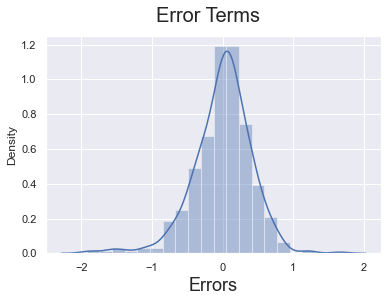

In [324]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

### Time to work on the test data now

In [325]:
scal_vars=['temp','hum','windspeed','cnt']

df_test[scal_vars]= scaler.transform(df_test[scal_vars])

In [326]:
y_test = df_test.pop('cnt')
X_test = df_test

In [327]:
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [328]:
y_test_pred = lm1.predict(X_test_new)


In [329]:
lm1.params

const         -0.640690
temp           0.507131
year           1.037397
spring        -0.337858
summer         0.164624
winter         0.384404
Sun            0.287069
working_day    0.248736
Light Snow    -1.355286
Mist          -0.362054
July          -0.218516
Sep            0.348335
dtype: float64

Text(0, 0.5, 'Predictions')

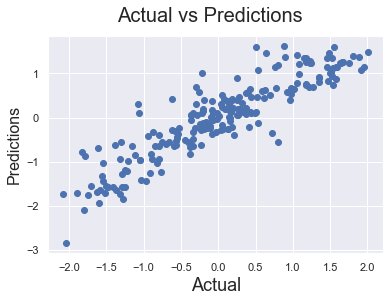

In [330]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16)                          # Y-label


In [331]:
#r2 score of the test set
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8119572896464371

In [332]:
#r2 score of the training set
r2_score(y_train, y_train_pred)

0.8286334007786941

Text(0, 0.5, 'y_test_pred')

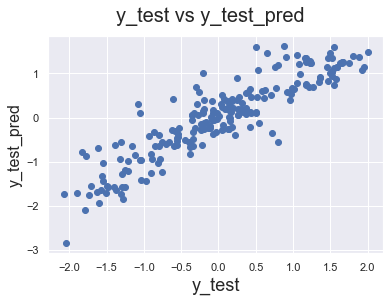

In [333]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)   

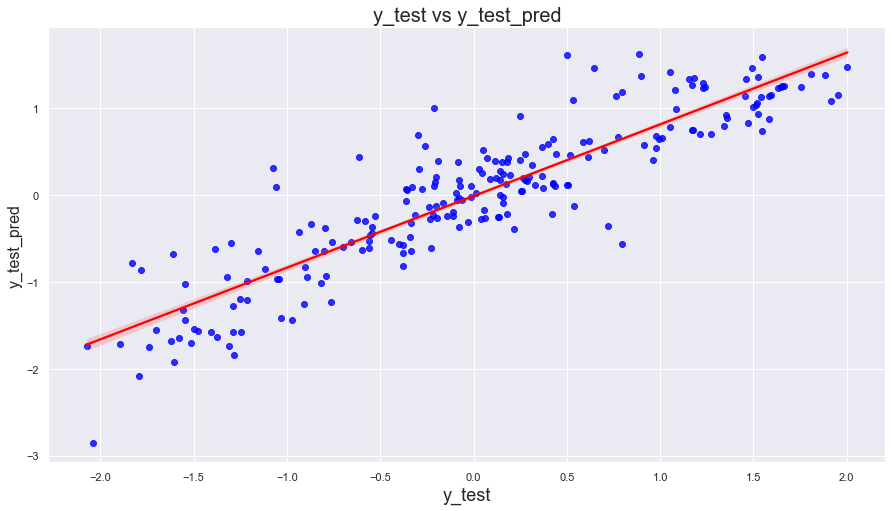

In [334]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

Below is the coefficients of the model :<br/><br/>
year	     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   1.037397 <br/>
temp	     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   0.507131 <br/>
winter	     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   0.384404 <br/>
Sep	         &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   0.348335 <br/>
Sun	         &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   0.287069 <br/>
working_day	 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   0.248736 <br/>
summer	     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   0.164624 <br/>
July	     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  -0.218516 <br/>
spring	     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  -0.337858 <br/>
Mist	     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  -0.362054 <br/>
const	     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  -0.64069 <br/>
Light Snow	 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  -1.355286 <br/>

Summary: <br/>
The summary of the model after data interpretation, visualisation, data-preparation, model building and training, residual analysis and evaluation of test model are as follows-  <br/> <br/>

The R-squared value of the train set is 82.86% whereas the test set has a value of 81.19% which suggests that our model broadly explains the variance quite accurately on the test set and thus we can conclude that it is a good model. <br/> <br/>

"Working day or not" and temperature are the important parameters for determining the bike demands. <br/> <br/>

There are more bike rentals during  the winters as compared to the summer and spring.  <br/> <br/>
We had observed that the months of September and October had higher use of rentals.  <br/> <br/>

Based on the above season based observations , there should be more marketing , discounts and incentives to customers during summer and winter season <br/> <br/>
Rentals were more in 2019 than 2018 which suggests that more customers were added and efforts must be made to retain all the existing customers so that new customers will keep coming due to the trend.